# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city 
    city_url = url + city + "&appid="+ weather_api_key
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ankazobe
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | meulaboh
Processing Record 5 of Set 1 | brigantine
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | osorio
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | ostrovnoy
Processing Record 19 of Set 1 | ferme-neuve
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | vaitupu
City not found. Skipping...
Processing R

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ankazobe,-18.3167,47.1167,289.66,94,100,1.92,MG,1675638367
1,saint-philippe,-21.3585,55.7679,298.92,86,100,4.84,RE,1675638368
2,bilibino,68.0546,166.4372,237.05,100,100,0.89,RU,1675638368
3,meulaboh,4.1363,96.1285,296.94,88,100,2.59,ID,1675638369
4,brigantine,39.4101,-74.3646,280.45,80,100,4.47,US,1675638123


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ankazobe,-18.3167,47.1167,289.66,94,100,1.92,MG,1675638367
1,saint-philippe,-21.3585,55.7679,298.92,86,100,4.84,RE,1675638368
2,bilibino,68.0546,166.4372,237.05,100,100,0.89,RU,1675638368
3,meulaboh,4.1363,96.1285,296.94,88,100,2.59,ID,1675638369
4,brigantine,39.4101,-74.3646,280.45,80,100,4.47,US,1675638123


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

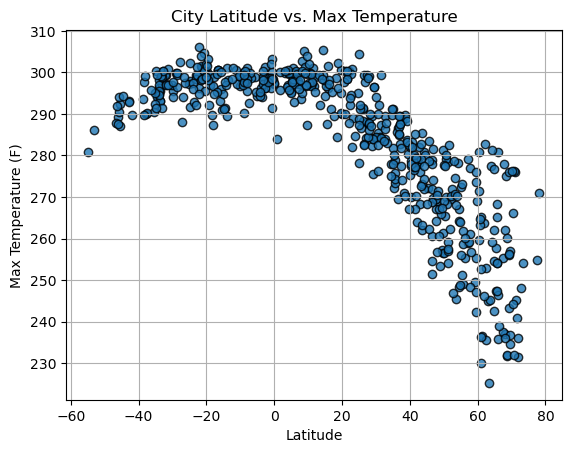

In [14]:
# Build scatter plot for latitude vs. temperature
lat_temp = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

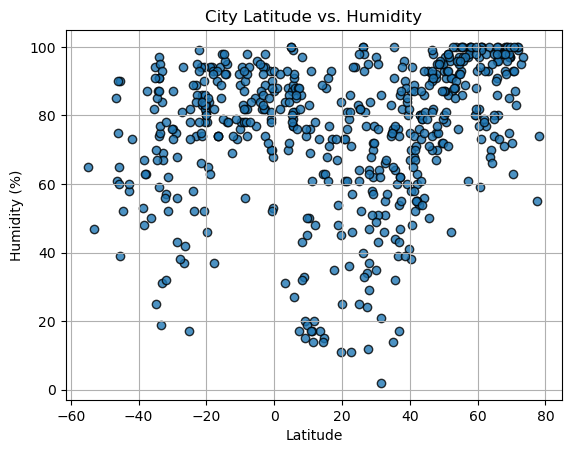

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.grid(True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

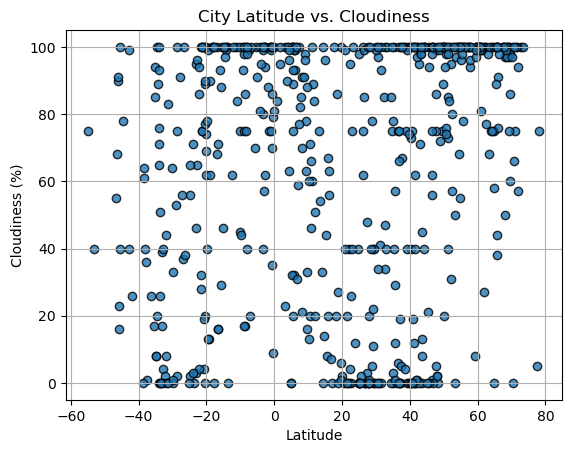

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title( "City Latitude vs. Cloudiness")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

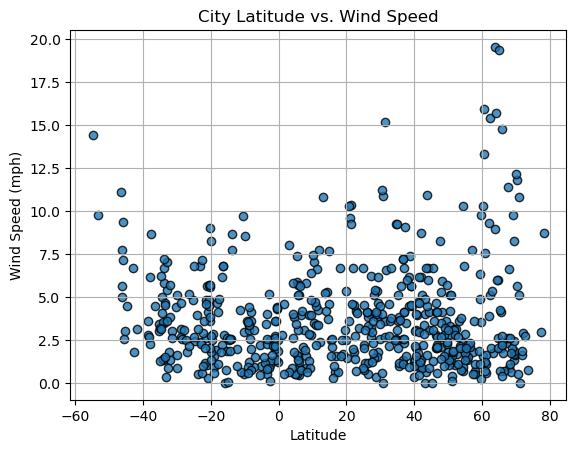

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label):
    plt.scatter(x_values,y_values)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    plt.grid(True)
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    regression_line = slope * x_values + intercept
    plt.text(0.5,0.5,equation,transform=plt.gcf().transFigure,fontsize=15,color="red")
    plt.plot(x_values, regression_line, "r")
    print(f"The r-value is {r_value}")
    
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bilibino,68.0546,166.4372,237.05,100,100,0.89,RU,1675638368
3,meulaboh,4.1363,96.1285,296.94,88,100,2.59,ID,1675638369
4,brigantine,39.4101,-74.3646,280.45,80,100,4.47,US,1675638123
7,anadyr,64.7500,177.4833,242.59,74,75,6.00,RU,1675638372
13,longyearbyen,78.2186,15.6401,271.06,74,75,8.75,SJ,1675638376


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ankazobe,-18.3167,47.1167,289.66,94,100,1.92,MG,1675638367
1,saint-philippe,-21.3585,55.7679,298.92,86,100,4.84,RE,1675638368
5,mount gambier,-37.8333,140.7667,290.04,63,36,2.27,AU,1675638371
6,hobart,-42.8794,147.3294,293.18,58,40,6.69,AU,1675638372
8,puerto ayora,-0.7393,-90.3518,303.13,90,35,3.58,EC,1675638121


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8526997502766648


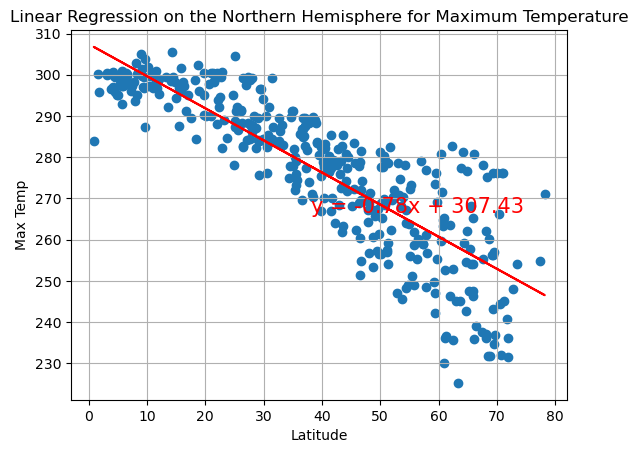

In [21]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp')


The r-value is 0.42235757988681666


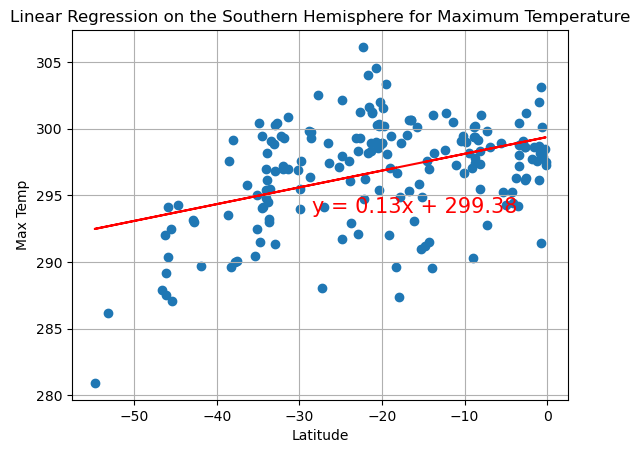

In [22]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a clear, strong relationship between the latitudinal proximity to the equator and Max Temperature. The sampling of the Northern Hemisphere exhibits a stronger correlation likely due to the increased sample size of Northern Hemisphere recordings as well as increased land mass above the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4141537246158526


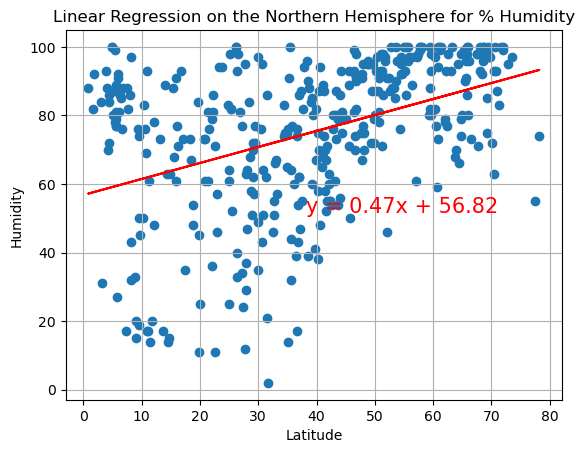

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Linear Regression on the Northern Hemisphere for % Humidity', 'Humidity')

The r-value is 0.3682882453102752


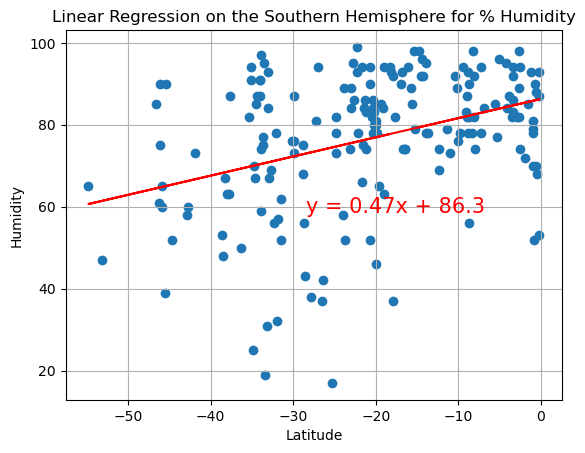

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Linear Regression on the Southern Hemisphere for % Humidity', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The relationship between humidity and latitude appears to be moderately correlated, particularly for the Northern Hemisphere. As with the analysis above, the Southern hemisphere exhibits a compartively weaker correlation likely due to the smaller sample size. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.26526804259825926


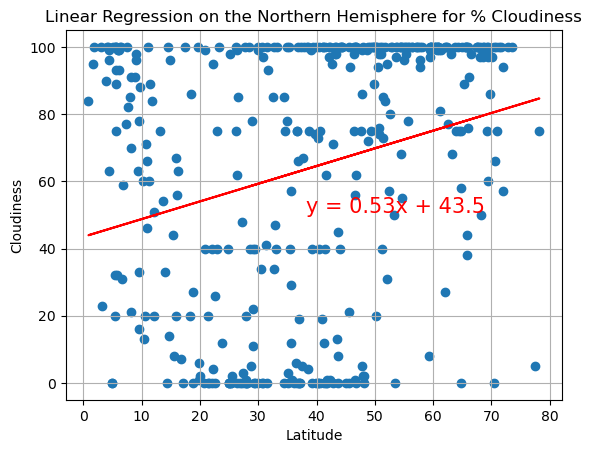

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness')

The r-value is 0.3703631159149917


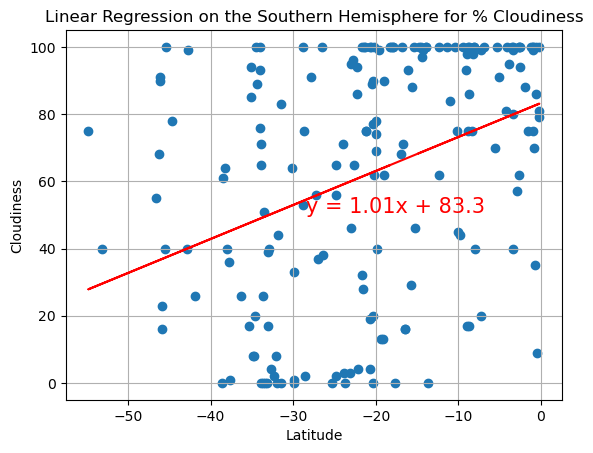

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Linear Regression on the Southern Hemisphere for % Cloudiness', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The correlation between cloudiness and latitude is relatively interesting as the correlation appears to be weaker than humidity and temperature levels. For both the Northern and Southern hemispheres, there is a weak to moderate correlation between the two variables. Of note, there appears to be unique samplings for both the Northern and Southern Hemispheres around 30 degrees from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.07716460272478877


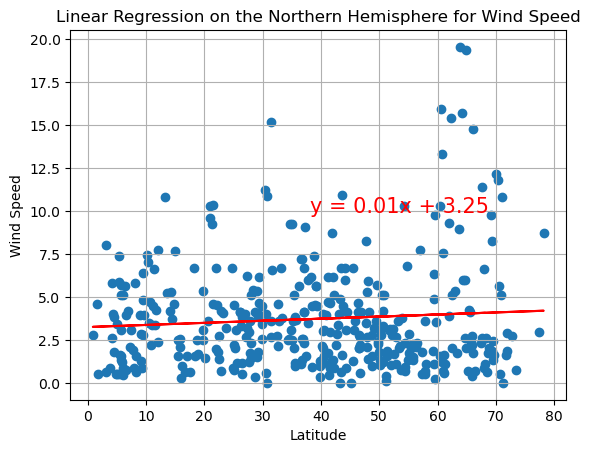

In [27]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed')

The r-value is -0.38121625441594353


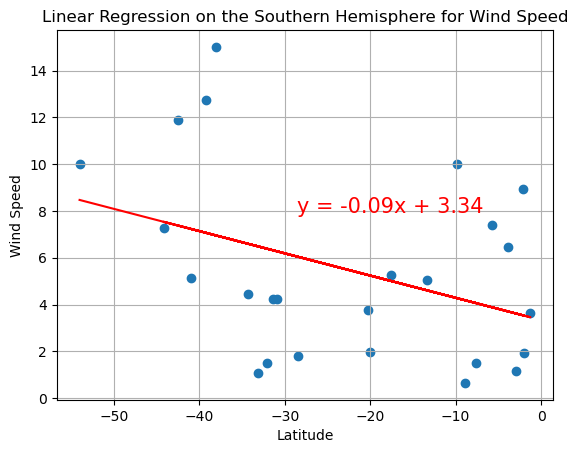

In [ ]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There appears to be a relatively weak correlation between latitude and wind speed. With such a low R value, this means that there is little correlation between latitude and wind speed.